In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load CSV
df = pd.read_csv("/content/drive/MyDrive/Raktikum_ML/Praktikum07/Data/apples_and_oranges.csv")

# Show basic info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


None

In [3]:
display(df.describe())

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [4]:
display(df.head())

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [5]:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])


X = df[["Weight", "Size"]]
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [7]:
y_pred = svm_clf.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)


print(f"Accuracy: {acc:.2f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 1.00

Confusion Matrix:
 [[4 0]
 [0 4]]

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



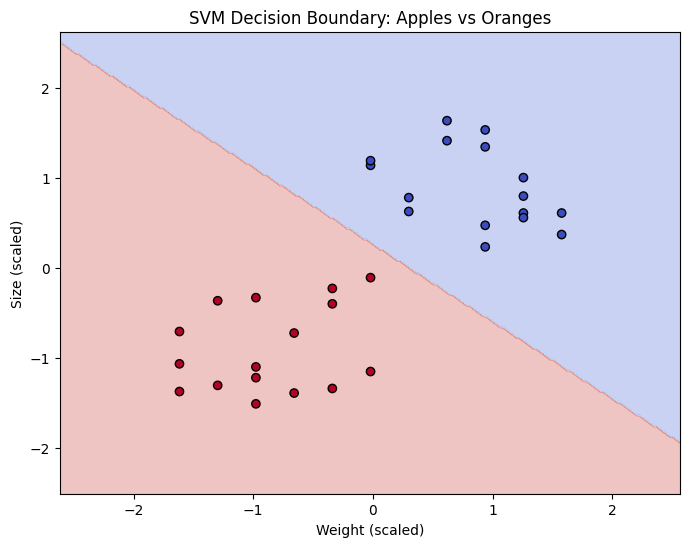

In [8]:
# Create mesh grid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


# Predict over grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary: Apples vs Oranges')
plt.xlabel('Weight (scaled)')
plt.ylabel('Size (scaled)')
plt.show()